In [1]:
import yfinance
import numpy as np
import pandas as pd


In [37]:
TICKER = "INFY"
data = yfinance.download(TICKER+".NS", period="8mo")

[*********************100%***********************]  1 of 1 completed


In [38]:
# ! pip install matplotlib

In [40]:
data.columns = ['open', 'high', 'low', 'close', 'adj close', 'volume']

In [41]:
d = data['close']

In [23]:
from ta.momentum import RSIIndicator

In [ ]:
RSIIndicator(window=14,)

In [60]:
start = 63.638
end = 77.65
(end-start)/start

0.22018290958232514

In [28]:
rsi_indicator = RSIIndicator(data['close'], 14)
data['RSI'] = rsi_indicator.rsi()

In [61]:
import numpy as np
import pandas as pd
from ta.momentum import RSIIndicator
np.random.seed(100)
class RSIStrategy:
    def __init__(self):
        self.overbought = 70
        self.oversold = 30

    def run(self,df):
        rsi_indicator = RSIIndicator(df['close'], 14)
        df['RSI'] = rsi_indicator.rsi() # added a column with RSI osscilator
        
        res = []
        current_stock = 0
        lim = 100
        for i in range(len(df)):
            frame = df.iloc[i]
            d = {}
            d["timestamp"] = frame['timestamp']
#             print("fram rsi ",frame['RSI'])
            if frame['RSI'] <= self.oversold:
                d["actions"] = 'buy'
                d["quantity"] = np.random.randint(5,lim,1)[0]
                current_stock += d["quantity"]
            
            elif frame['RSI'] >= self.overbought and current_stock >= lim:
                d["actions"] = 'sell'
                d["quantity"] = np.random.randint(5,current_stock*0.5,1)[0]
                current_stock -= d["quantity"]
                
            else:
                continue  
            res.append(d)

        return res

rs = RSIStrategy()
run = rs.run

In [62]:
data

,open,high,low,close,adj close,volume,RSI
Date,,,,,,,
2020-10-08,1090.000000,1124.000000,1088.400024,1093.699951,1070.523682,21482613,NaN
2020-10-09,1095.099976,1113.300049,1088.449951,1106.800049,1083.346069,10567867,NaN
2020-10-12,1123.000000,1140.000000,1112.099976,1132.099976,1108.109863,14633537,NaN
2020-10-13,1135.550049,1166.050049,1135.550049,1157.800049,1133.265503,17523825,NaN
2020-10-14,1162.000000,1164.900024,1131.099976,1137.000000,1112.906128,16649573,NaN
...,...,...,...,...,...,...,...
2021-06-02,1380.750000,1391.949951,1365.000000,1378.650024,1378.650024,9272276,55.493382
2021-06-03,1388.099976,1399.000000,1377.050049,1389.650024,1389.650024,5115645,59.372429
2021-06-04,1393.949951,1396.900024,1377.650024,1385.650024,1385.650024,4194328,57.388257


In [63]:
run(data)

KeyError: 'timestamp'

In [64]:
for i in range(data.shape[0]):
    if str(i) in rsi.keys():
        #decide whether to buy, sell or stay put
        if rsi[str(i)] <= oversold:
            buy_shares = randint(1,10)
            curr_price = data.iloc[i]['Open']
#             profit -= curr_price*buy_shares
            totalBuy += curr_price*buy_shares
            shares += buy_shares
            shares_bought += buy_shares
            history.append((i, data.iloc[i].name, 'buy', buy_shares, shares))
        elif rsi[str(i)] >= overbought:
            if shares > 0:
                sell_shares = randint(1, shares)
                curr_price = data.iloc[i]['Open']
#                 profit += curr_price*sell_shares
                totalSell += curr_price*sell_shares
                shares -= sell_shares
                shares_sold += sell_shares
                history.append((i, data.iloc[i].name, 'sell', sell_shares, shares))

KeyError: 'Open'

In [30]:
class RSI:
    def __init__(self,window=14):
        self.window = window
        

In [14]:
from random import randint
import random

random.seed(10)

shares_bought = 0
shares_sold = 0
shares = 0
history = []
profit = 0
overbought, oversold = 70,30
totalBuy, totalSell = 0,0

rs_val = []
def getRelativeStrength(arr):
    from functools import reduce
    changes = [arr[i]-arr[i-1] for i in range(1,len(arr))]
    close_up_sum = sum(c for c in changes if c > 0)/len(arr)
    close_down_sum = sum(abs(c) for c in changes if c < 0)/len(arr)
    
    return close_up_sum/close_down_sum

def getRelativeStrengthIndex(ds):
    maxLen = ds.shape[0]
    n_period = 15
    rsind = {}
    
    for i in range(n_period, maxLen):
        curr_date = str(ds.index[i])
        rs = getRelativeStrength(ds.values[i-n_period:i])
        rsind[str(i)] = 100 - (100/(1+rs))
        rs_val.append([i, rs])
    
    return rsind
rsi = getRelativeStrengthIndex(d)
for i in range(data.shape[0]):
    if str(i) in rsi.keys():
        #decide whether to buy, sell or stay put
        if rsi[str(i)] <= oversold:
            buy_shares = randint(1,10)
            curr_price = data.iloc[i]['Open']
#             profit -= curr_price*buy_shares
            totalBuy += curr_price*buy_shares
            shares += buy_shares
            shares_bought += buy_shares
            history.append((i, data.iloc[i].name, 'buy', buy_shares, shares))
        elif rsi[str(i)] >= overbought:
            if shares > 0:
                sell_shares = randint(1, shares)
                curr_price = data.iloc[i]['Open']
#                 profit += curr_price*sell_shares
                totalSell += curr_price*sell_shares
                shares -= sell_shares
                shares_sold += sell_shares
                history.append((i, data.iloc[i].name, 'sell', sell_shares, shares))

totalProfit = totalSell - totalBuy

In [15]:
history

[(18, Timestamp('2020-11-03 00:00:00'), 'buy', 10, 10),
 (19, Timestamp('2020-11-04 00:00:00'), 'buy', 1, 11),
 (50, Timestamp('2020-12-21 00:00:00'), 'sell', 7, 4),
 (52, Timestamp('2020-12-23 00:00:00'), 'sell', 4, 0),
 (79, Timestamp('2021-02-02 00:00:00'), 'buy', 10, 10),
 (81, Timestamp('2021-02-04 00:00:00'), 'buy', 1, 11),
 (108, Timestamp('2021-03-16 00:00:00'), 'sell', 4, 7),
 (109, Timestamp('2021-03-17 00:00:00'), 'sell', 4, 3),
 (110, Timestamp('2021-03-18 00:00:00'), 'sell', 2, 1),
 (125, Timestamp('2021-04-12 00:00:00'), 'sell', 1, 0),
 (137, Timestamp('2021-04-30 00:00:00'), 'buy', 3, 3),
 (138, Timestamp('2021-05-03 00:00:00'), 'buy', 1, 4),
 (139, Timestamp('2021-05-04 00:00:00'), 'buy', 9, 13),
 (140, Timestamp('2021-05-05 00:00:00'), 'buy', 8, 21),
 (159, Timestamp('2021-06-02 00:00:00'), 'sell', 11, 10),
 (161, Timestamp('2021-06-04 00:00:00'), 'sell', 2, 8),
 (162, Timestamp('2021-06-07 00:00:00'), 'sell', 4, 4)]

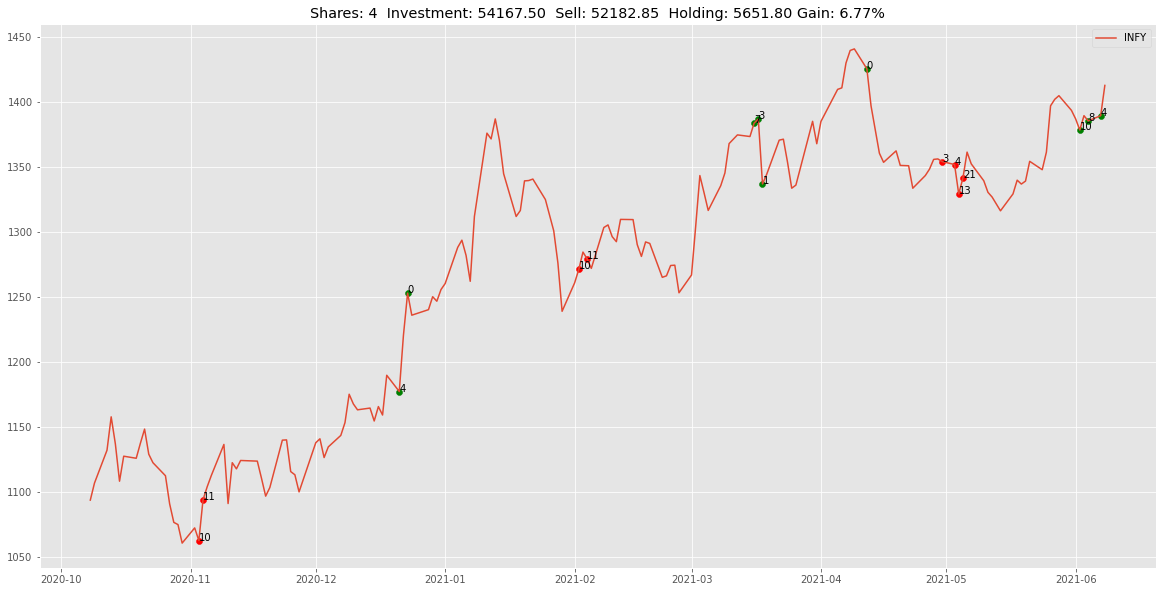

In [16]:
import matplotlib.pyplot as plt

buy_plot = np.array([[h[1], data.iloc[h[0]]['Close'], h[-1]] for h in history if h[2] == 'buy'])
sell_plot = np.array([[h[1], data.iloc[h[0]]['Close'], h[-1]] for h in history if h[2] == 'sell'])
holding = shares*data.iloc[-1]['Close']

plt.style.use('ggplot')
plt.figure(figsize=(20,10))
plt.plot(data['Close'].index, data['Close'].values, label=TICKER)
plt.scatter(buy_plot[:,0], buy_plot[:,1], c='red')
for i,s in enumerate(buy_plot[:,2]):
    plt.annotate(str(s), (buy_plot[i,0],buy_plot[i,1]))
plt.scatter(sell_plot[:,0], sell_plot[:,1], c='green')
for i,s in enumerate(sell_plot[:,2]):
    plt.annotate(str(s), (sell_plot[i,0],sell_plot[i,1]))
plt.title(f"Shares: {shares}  Investment: {totalBuy:.2f}  Sell: {totalSell:.2f}  Holding: {holding:.2f} Gain: {(holding+totalSell-totalBuy)/totalBuy*100:.2f}%")
plt.legend()
plt.show()